In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# TensorFlow 버전 확인 (선택 사항)
print(f"TensorFlow Version: {tf.__version__}")

# GPU 사용 가능 여부 확인 (선택 사항)
print(f"Num GPUs Available: {len(tf.config.experimental.list_physical_devices('GPU'))}")

TensorFlow Version: 2.20.0
Num GPUs Available: 0


In [2]:
# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 데이터 전처리
# 픽셀 값을 0-255에서 0-1 범위로 정규화
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# MLP 입력 형태를 위해 채널 차원 추가 (Keras Conv2D 입력 형태는 (height, width, channel))
# MNIST는 흑백이므로 채널이 1
x_train_mlp = np.expand_dims(x_train, -1) # (60000, 28, 28, 1)
x_test_mlp = np.expand_dims(x_test, -1)   # (10000, 28, 28, 1)

# CNN 입력 형태는 이미 (height, width, channel)을 만족 (expand_dims 덕분)
x_train_cnn = x_train_mlp
x_test_cnn = x_test_mlp

# 레이블을 원-핫 인코딩
num_classes = 10
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

print(f"x_train_mlp shape: {x_train_mlp.shape}")
print(f"y_train_one_hot shape: {y_train_one_hot.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step 
x_train_mlp shape: (60000, 28, 28, 1)
y_train_one_hot shape: (60000, 10)


In [6]:
# MLP 정의
mlp_model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # 입력 이미지를 1차원 벡터로 변환 (28*28*1 = 784)
    Dense(128, activation='relu', name='mlp_dense_1'), # 첫 번째 은닉층 128개 뉴런, ReLU 활성화
    Dense(64, activation='relu', name='mlp_dense_2'),  # 두 번째 은닉층 64개 뉴런, ReLU 활성화
    Dense(num_classes, activation='softmax', name='mlp_output') # 출력층 10개 뉴런, Softmax 활성화
])

# 모델 (하이퍼파라미터 설정)
mlp_model.compile(
    optimizer='adam',                   # 최적화 알고리즘: Adam
    loss='categorical_crossentropy',    # 손실 함수: 분류 문제에 적합한 Cross-entropy
    metrics=['accuracy']                # 평가 지표: 정확도
)

# 모델 구조 확인
print("--- MLP Model Summary (MNIST) ---")
mlp_model.summary()

# MLP 학습
print("\n--- Training MLP Model (MNIST) ---")
mlp_history = mlp_model.fit(
    x_train_mlp, y_train_one_hot,
    epochs=10,             # 전체 데이터셋을 10번 반복 학습
    batch_size=32,         # 한 번에 32개 샘플 처리
    validation_split=0.2,  # 학습 데이터의 20%를 검증 데이터로 사용
    verbose=1              # 학습 과정 출력
)

--- MLP Model Summary (MNIST) ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mlp_dense_1 (Dense)                  │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mlp_dense_2 (Dense)                  │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mlp_output (Dense)                   │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


--- Training MLP Model (MNIST) ---
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9205 - loss: 0.2707 - val_accuracy: 0.9593 - val_loss: 0.1383
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9664 - loss: 0.1115 - val_accuracy: 0.9656 - val_loss: 0.1134
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9761 - loss: 0.0788 - val_accuracy: 0.9673 - val_loss: 0.1060
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9819 - loss: 0.0581 - val_accuracy: 0.9722 - val_loss: 0.0993
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9857 - loss: 0.0442 - val_accuracy: 0.9737 - val_loss: 0.0980
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9883 - loss: 0.0359 - val_accuracy: 0.9724 - val_loss: 0.0981
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9897 - loss: 0.0300 - val_accuracy: 0.9711 - val_loss: 0.1126
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step 

In [7]:
# CNN 모델 정의
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='cnn_conv_1'), # 첫 번째 합성곱층: 32개 필터, 3x3 커널, ReLU
    MaxPooling2D((2, 2), name='cnn_pool_1'), # 첫 번째 풀링층: 2x2
    Conv2D(64, (3, 3), activation='relu', name='cnn_conv_2'), # 두 번째 합성곱층: 64개 필터, 3x3 커널, ReLU
    MaxPooling2D((2, 2), name='cnn_pool_2'), # 두 번째 풀링층: 2x2
    Flatten(name='cnn_flatten'),       # 2D 특징 맵을 1차원 벡터로 변환
    Dense(128, activation='relu', name='cnn_dense_1'), # 완전 연결층 128개 뉴런, ReLU
    Dense(num_classes, activation='softmax', name='cnn_output') # 출력층 10개 뉴런, Softmax
])

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 모델 구조 확인
print("--- CNN Model Summary (MNIST) ---")
cnn_model.summary()

# CNN 학습
print("\n--- Training CNN Model (MNIST) ---")
cnn_history = cnn_model.fit(
    x_train_cnn, y_train_one_hot,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

--- CNN Model Summary (MNIST) ---


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ cnn_conv_1 (Conv2D)                  │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cnn_pool_1 (MaxPooling2D)            │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cnn_conv_2 (Conv2D)                  │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cnn_pool_2 (MaxPooling2D)            │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cnn_flatten (Flatten)                │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cnn_dense_1 (Dense)                  │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cnn_output (Dense)                   │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


--- Training CNN Model (MNIST) ---
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9550 - loss: 0.1454 - val_accuracy: 0.9822 - val_loss: 0.0562
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9851 - loss: 0.0465 - val_accuracy: 0.9854 - val_loss: 0.0483
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9900 - loss: 0.0306 - val_accuracy: 0.9875 - val_loss: 0.0418
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9927 - loss: 0.0229 - val_accuracy: 0.9904 - val_loss: 0.0371
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9945 - loss: 0.0166 - val_accuracy: 0.9870 - val_loss: 0.0522
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9952 - loss: 0.0137 - val_accuracy: 0.9888 - val_loss: 0.0457
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9965 - loss: 0.0102 - val_accuracy: 0.9885 - val_loss: 0.0511
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step 


--- MLP Model Evaluation (MNIST) ---
MLP Training Accuracy: 0.9881
MLP Test Accuracy: 0.9765

--- CNN Model Evaluation (MNIST) ---
CNN Training Accuracy: 0.9970
CNN Test Accuracy: 0.9906


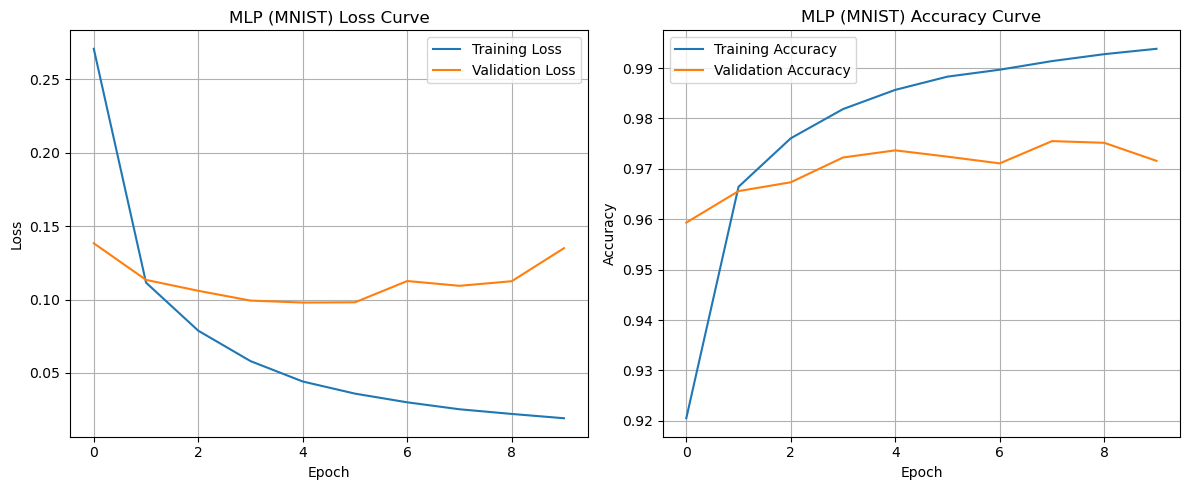

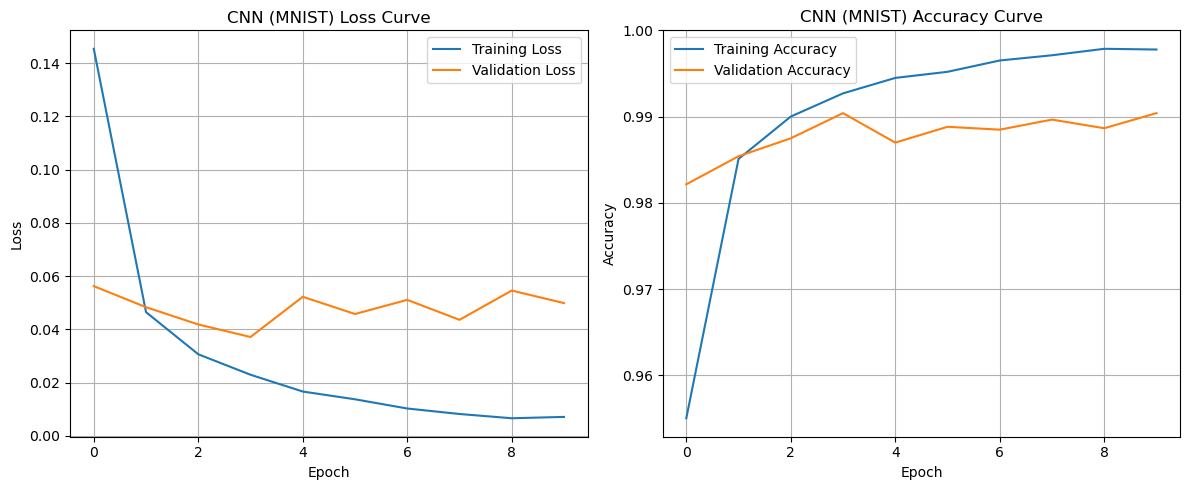

In [8]:
# MLP 평가
print("\n--- MLP Model Evaluation (MNIST) ---")
mlp_train_loss, mlp_train_acc = mlp_model.evaluate(x_train_mlp, y_train_one_hot, verbose=0)
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(x_test_mlp, y_test_one_hot, verbose=0)
print(f"MLP Training Accuracy: {mlp_train_acc:.4f}")
print(f"MLP Test Accuracy: {mlp_test_acc:.4f}")

# CNN 평가
print("\n--- CNN Model Evaluation (MNIST) ---")
cnn_train_loss, cnn_train_acc = cnn_model.evaluate(x_train_cnn, y_train_one_hot, verbose=0)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test_one_hot, verbose=0)
print(f"CNN Training Accuracy: {cnn_train_acc:.4f}")
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")


# Loss/Accuracy 커브 시각화 함수
def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Loss 그래프
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Accuracy 그래프
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# MLP Loss/Accuracy 커브 시각화
plot_history(mlp_history, "MLP (MNIST)")

# CNN Loss/Accuracy 커브 시각화
plot_history(cnn_history, "CNN (MNIST)")